# Grid Search
Grid search is used for hyper-parameters tuning in order to choose the best combination of hyper-parameters that minimizes the error of the validation set. <br>

Grid search works by fitting the model to every possible combination of hyper-parameters. <br>
As a result of this, when the number of parameters increase, grid search duration increases.

# Grid Search and Polynomial Linear Regression
The main goal of this notebook is to give an easy-to-understand example of Polynomial Linear Regression and Grid Search in order to show: <br>
1) how grid search works in a simple way <br>
2) how increasing the number of hyperparameters increases duration of grid search

## Step 1
Create x and y data, x is the feature and y is the target.<br>
$${Y = {X}^3 + 8{X}^2 + 25{X} + 2}$$

As here we are creating both features and target we expect that the best polynomial features that describe the data will be of degree 3

In [1]:
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [2]:
x = np.linspace(2,30,50).reshape(50,1)

In [3]:
y = x**3 + 8*x**2 + 25*x + 2 
y = y.reshape(50,1)

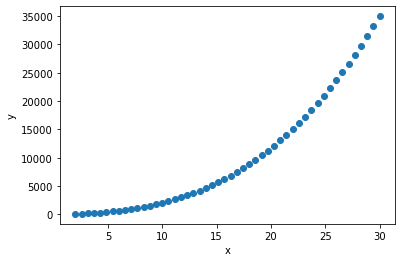

In [4]:
plt.scatter(x,y);
plt.xlabel('x');
plt.ylabel('y');

# Step 2
Here we start by creating a pipeline of a polynomial features degree 25 and Linear Regression model

In [5]:
model = Pipeline([('poly', PF(degree=25)),
                  ('linear',LR(fit_intercept=False))])

model.fit(x,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=25)),
                ('linear', LinearRegression(fit_intercept=False))])

In [6]:
h = model.predict(x)

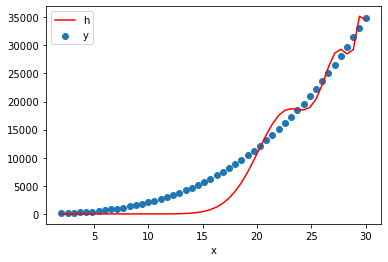

In [7]:
plt.scatter(x,y);
plt.plot(x,h,'r');
plt.xlabel('x');
plt.legend(['h','y']);

# Result
Here we can see that by just choosing the wrong polynomial features degree, model couldn't fit the data

# Step 3
Using Grid search to only choose the polynomial feature degree that minimizes cross-validation error <br>
•param_grid is a dictionary with the hyperparameters as the keys and the range of values the search will be on are the dictionary values.

In [8]:
# create a pipeline for grid search
model_gs = Pipeline([('poly', PF()),
                  ('linear',LR())])


start = timeit.default_timer()

lr = GridSearchCV(model_gs,param_grid = {'poly__degree': np.arange(25)},cv=5)
# fit the data to the grid search
lr.fit(x,y)

stop = timeit.default_timer()

print('Search Duration of a single hyperparameter: ', stop - start) 

Search Duration of a single hyperparameter:  0.5679496999999998


In [9]:
lr.best_params_

{'poly__degree': 3}

In [10]:
# this line tells you what other hyperparameters your model has
model_gs.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'poly', 'linear', 'poly__degree', 'poly__include_bias', 'poly__interaction_only', 'poly__order', 'linear__copy_X', 'linear__fit_intercept', 'linear__n_jobs', 'linear__normalize', 'linear__positive'])

In [11]:
h_gs = lr.predict(x)

# Result
When we used grid search the best polynomial feature degree was choosen to be 3 as expected

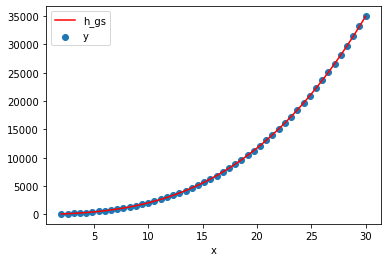

In [12]:
plt.scatter(x,y);
plt.plot(x,h_gs,'r');
plt.xlabel('x');
plt.legend(['h_gs','y']);

# Step 4
Repeat the previous steps but with ElasticNet linear regression by searching for polynomial features degree and alpha

In [13]:

model_el = Pipeline([('poly', PF()),
                  ('elnet',ElasticNet())])

start = timeit.default_timer()

el = GridSearchCV(model_el,param_grid = {'poly__degree': np.arange(20),
                                          'elnet__alpha':[0.01,0.001,0.1,0.003,0.3]},cv=5);
el.fit(x,y);

stop = timeit.default_timer()

print('Search Duration of two hyperparameters: ', stop - start)  

Search Duration of two hyperparameters:  4.390437


In [14]:
el.best_params_

{'elnet__alpha': 0.1, 'poly__degree': 16}

In [15]:
h_el = el.predict(x)

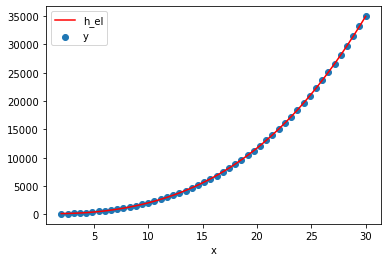

In [16]:
plt.scatter(x,y);
plt.plot(x,h_el,'r');
plt.xlabel('x');
plt.legend(['h_el','y']);

In [17]:
model_el.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'poly', 'elnet', 'poly__degree', 'poly__include_bias', 'poly__interaction_only', 'poly__order', 'elnet__alpha', 'elnet__copy_X', 'elnet__fit_intercept', 'elnet__l1_ratio', 'elnet__max_iter', 'elnet__normalize', 'elnet__positive', 'elnet__precompute', 'elnet__random_state', 'elnet__selection', 'elnet__tol', 'elnet__warm_start'])

# Step 5
Repeat the previous steps but with ElasticNet linear regression by searching for polynomial features degree, alpha and L1_ratio

In [18]:
start = timeit.default_timer()

el2 = GridSearchCV(model_el,param_grid = {'poly__degree': np.arange(20),
                                          'elnet__alpha':[0.01,0.001,0.1,0.003,0.3],
                                           'elnet__l1_ratio':[0.01,0.001,0.1,0.003,0.3]},
                                           cv=5);
el2.fit(x,y);

stop = timeit.default_timer()

print('Search Duration of three hyperparameters: ', stop - start)  

Search Duration of three hyperparameters:  15.812801200000001


In [19]:
el2.best_params_

{'elnet__alpha': 0.1, 'elnet__l1_ratio': 0.3, 'poly__degree': 8}

In [20]:
h_el2 = el2.predict(x)

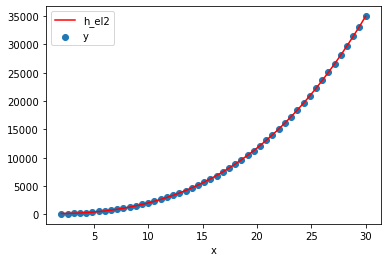

In [22]:
plt.scatter(x,y);
plt.plot(x,h_el2,'r');
plt.xlabel('x');
plt.legend(['h_el2','y']);

# Final Results
We can see that grid search did a good job finding the best combinations that fit the data in all three cases, but we can also conclude that the duration of grid search exponentialy increases with the number of hyperparameters. 